### Creating, Evaluating, and Deploying a Churn Prediction Model
##### MLOps-using-MLflow: an end-to-end example

##### Introduction
Churn prediction is a process used by companies to identify customers who are likely to discontinue their use of a product or service in the near future. Through churn prediction, companies can take steps to prevent customers from leaving and reduce customer churn rate. This is done by analyzing customer data and using machine learning algorithms to detect patterns and identify customers who are at risk of leaving.

For a data science team charged with creating this model, they will usually undergo a set of key tasks: 

1. Load Customer Churn Data From Silver Layer
2. Accelerate data prep with Data Wrangler in Microsoft Fabric 
2. Exploring data to understand the features available, any interesting patterns that can be found
3. Build an ML model and track experiment run with MLFlow
4. Log ML model in the built-in model registry using MLFlow
5. Run batch scoring on Spark with our scalable PREDICT UDF
6. Store predictions in the Lakehouse (Delta parquet)

##### Getting Started with Data Science Notebook Copilot

##### **Ways to Use Copilot**

There are **four ways** to interact with Copilot: 

- A **Chat Panel** allows you to chat back and forth with Copilot. You can ask for code snippets and answers to questions. This is the same panel that you see throughout the rest of Fabric, meaning that you can also ask questions about your entire workspace. 

- **Copilot on Notebook Cells** allows you to prompt Copilot from the top of each of your notebook cells to generate code in code cells or Markdown in Markdown cell. 

- **iPython “magics” commands** allows you to ask Copilot questions or for code using simple magic commands in notebook cells. %%code will generate code in a cell much like Copilot on Notebook Cells, but %%chat in code cells allows you to ask questions and get a text response in the cell output 

- **Quick Actions** that simplify tedious tasks using AI, such as fixing code errors and adding code comments 

##### Feature 1: Chat Panel 

**Question:** Please load the "fact_churn" table from the Lakehouse_Silver Lakehouse Explorer into a Spark DataFrame. Then convert that into pandas dataframe as df

In [ ]:
# ATTENTION: AI-generated code can include errors or operations you didn't intend. Review the code in this cell carefully before running it.

# Load the "fact_churn" table from the Lakehouse_Silver Lakehouse Explorer into a Spark DataFrame
df_spark = spark.read.table("lakehouse_silver.fact_churn")

# Convert the Spark DataFrame to a pandas DataFrame
df = df_spark.toPandas()

##### Feature 2: Copilot on Notebook Cells 

######  2.1 : Data Wrangler

**Question:** Create a Data Wrangling function for df with the non-null values in the TotalAmount, dropping CustomerID and converting TotalAmount, UnitPrice into float and tenure to integer values. Then apply the function into df to create wrangled dataframe df

In [ ]:
# ATTENTION: AI-generated code can include errors or operations you didn't intend. Review the code in this cell carefully before running it.

def data_wrangling(df):
    df = df.dropna(subset=['TotalAmount'])
    df = df.drop(columns=['CustomerID'])
    df['TotalAmount'] = df['TotalAmount'].astype(float)
    df['UnitPrice'] = df['UnitPrice'].astype(float)
    df['tenure'] = df['tenure'].astype(int)
    
    return df

df = data_wrangling(df)

###### 2.2 : Exploratory Data Analysis

**Question:** Create a pivot table of average with min and max TotalAmount by StoreContract and Churn. Then show the output of pivot table.

In [ ]:
# ATTENTION: AI-generated code can include errors or operations you didn't intend. Review the code in this cell carefully before running it.

# Create a pivot table of average, min, and max TotalAmount by StoreContract and Churn
pivot_table = df.pivot_table(index='StoreContract', columns='Churn', values='TotalAmount', aggfunc={'mean', 'min', 'max'})

pivot_table

##### Feature 3: iPython “magics” commands

In [ ]:
%%chat
Create a Seaborn scatter plot with tenure, TotalAmount, and Churn, DO NOT Create a new column that indicates whether a customer has churned or not

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='tenure', y='TotalAmount', hue='Churn', palette='Set1')
plt.title('Relationship between Tenure and Total Amount with Churn Status')
plt.show()

In [ ]:
%%code
Create a Seaborn scatter plot with tenure, TotalAmount, and Churn, DO NOT Create a new column that indicates whether a customer has churned or not

##### Feature 4: Quick Actions

In [ ]:
# The following is the fixed python code based on the error indicated.

# Import seaborn as sns
import seaborn as sns

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a scatter plot with tenure, TotalAmount, and Churn
sns.scatterplot(x='tenure', y='TotalAmount', hue='Churn', data=df)
# Add labels and title
plt.xlabel('Tenure (months)')
plt.ylabel('Total Amount ($)')
plt.title('Customer Churn by Tenure and Total Amount')

# Show the plot
plt.show()

#### Data Science Process

##### Step 0: Installation and Imports

We import libraries to access pre-written code built by other developers. This code can be used to add functionality to our own programs without having to write it all from scratch. Examples of libraries include math libraries, image processing libraries, and web application frameworks.

In [1]:
#Install required libraries
%pip install mlflow

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 8, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 84.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 110.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.6/565.6 kB 141.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 58.9 MB/s eta 0:00:00
  Attempting uninstall: mlflow-skinny
    Found existing installation: mlflow-skinny 2.6.0
    Not uninstalling mlflow-skinny at /home/trusted-service-user/cluster-env/trid

In [2]:
import numpy as np
import pandas as pd

# Loading MLflow libraries
import mlflow
from mlflow.models.signature import infer_signature
from lightgbm import LGBMClassifier

# Loading packages for building a Machine Learning pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Loading libraries for visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as display
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

from synapse.ml.lightgbm import LightGBMClassifier
from synapse.ml.automl import TuneHyperparameters
from synapse.ml.train import ComputeModelStatistics
from synapse.ml.predict import MLFlowTransformer
import lightgbm as lgb

from synapse.ml.train import TrainClassifier
from pyspark.ml.classification import (
    LogisticRegression,
    RandomForestClassifier,
    GBTClassifier
)

from synapse.ml.automl import *
import warnings
warnings.filterwarnings("ignore")

print("All Modules Loaded")

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 10, Finished, Available, Finished)

All Modules Loaded


##### Step 1: Load customer churn (labeled) data from silver layer Delta tables into Spark DataFrame

In [3]:
df = spark.sql("SELECT * FROM Lakehouse_Silver.fact_churndata")
df.show(6)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 11, Finished, Available, Finished)

+----------+------+-------------+-------+----------+------+--------+----------+--------------+-----------+---------------+--------+-------------+----------------+--------------------+---------+-----------+-----+
|CustomerID|Gender|SeniorCitizen|Partner|Dependents|tenure|Discount|OutletSize|OnlineDelivery|OrderStatus|CustomerSupport|   Brand|StoreContract|PaperlessBilling|       PaymentMethod|UnitPrice|TotalAmount|Churn|
+----------+------+-------------+-------+----------+------+--------+----------+--------------+-----------+---------------+--------+-------------+----------------+--------------------+---------+-----------+-----+
|7795-CFOCW|  Male|            0|     No|        No|    45|      No|       Big|           Yes|    Shipped|            Yes|   Local|     One year|              No|Bank transfer (au...|     42.3|    1840.75|   No|
|1708-PBBOA|Female|            0|     No|        No|    42|      No|       Big|           Yes|    Shipped|            Yes|   Local|     One year|       

###### 1.1: Visualize Spark DataFrame  
Gif below show out-of-the-box DataFrame visualization options available in Microsoft Fabric notebook. Chart view in Microsoft Fabric provides an interactive visualization interface for exploring and analyzing data. It offers a variety of chart types and customization options to create insightful visualizations that help in understanding patterns, trends, and relationships within the data.

##### Step 2: Accelerate data prep with Data Wrangler in Microsoft Fabric

Data Wrangler is a notebook-based tool that provides users with an immersive experience to conduct exploratory data analysis. The feature combines a grid-like data display with dynamic summary statistics, built-in visualizations, and a library of common data-cleaning operations. Each operation can be applied in a matter of clicks, updating the data display in real time and generating code that can be saved back to the notebook as a reusable function.

Data preparation is essential for successful machine learning because it allows the machine learning algorithm to work efficiently and effectively. In this step we are going to change the data type, remove columns which are not essential for traing and resetting the index. These tasks help make sure that the data is clean, consistent, and ready for machine learning. Data preparation helps reduce noise and improve the quality of the data, which helps improve the accuracy of the machine learning algorithms. 

Additionally, data preparation will help reduce the time needed to train the machine learning model, making it faster and more efficient.

The null values from **TotalAmount** column are dropped.

**CustomerID** column is dropped.

**TotalAmount**, **UnitPrice** and **Tenure_Month** are converted from string to numeric, using the user defined function given by Data Wrangler

In the below gif, gives the experience of Data Wrangling process


In [4]:
#Data Wrangling function
df = df.toPandas()

def clean_data(df):
    
    # Drop rows with missing data in column: 'TotalAmount'
    df = df.dropna(subset=['TotalAmount'])
    # Drop column: 'CustomerID'
    df = df.drop(columns=['CustomerID'])
    # Change column type to float32 for column: 'UnitPrice'
    df = df.astype({'UnitPrice': 'float32'})
    # Change column type to int32 for column: 'Tenure_Month'
    df = df.astype({'tenure': 'int32'})
    return df

df = clean_data(df.copy())
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors="coerce")

df = df.loc[:,~df.columns.duplicated()]  

df.head()

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 12, Finished, Available, Finished)

,Gender,SeniorCitizen,Partner,Dependents,tenure,Discount,OutletSize,OnlineDelivery,OrderStatus,CustomerSupport,Brand,StoreContract,PaperlessBilling,PaymentMethod,UnitPrice,TotalAmount,Churn
0,Male,0,No,No,45,No,Big,Yes,Shipped,Yes,Local,One year,No,Bank transfer (automatic),42.299999,1840.75,No
1,Female,0,No,No,42,No,Big,Yes,Shipped,Yes,Local,One year,Yes,Electronic check,54.750000,2348.45,No
2,Female,0,No,No,11,No,Big,No,Shipped,Yes,Local,One year,Yes,Credit card (automatic),40.400002,422.60,No
3,Female,0,No,No,40,No,Big,Yes,Shipped,Yes,National,One year,Yes,Bank transfer (automatic),54.549999,2236.20,No
4,Male,0,No,Yes,63,No,Big,Yes,Shipped,Yes,Local,One year,Yes,Bank transfer (automatic),40.599998,2588.95,No


##### Step 3: Exploratory Data Analysis

Exploratory Data Analysis (EDA) examines and explores a given data set to uncover patterns, draw conclusions, and identify meaningful insights. This process requires analyzing the data to summarize and visualize it in such a way that the data can be better understood. 

EDA is an important part of the process, as it helps to identify the underlying structure of the data and provides insights into any trends or relationships that may exist. Also EDA helps to identify important features of the data and to identify areas of further inquiry.

As the length of time customers remain with a company, measured in months, increases and their overall expenditure rises, we can observe a corresponding decline in the number of customers who choose to discontinue their service with the company, i.e. churn.

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 13, Finished, Available, Finished)

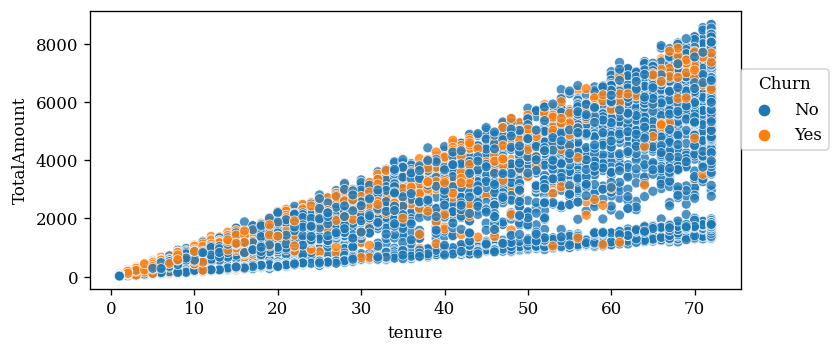

In [5]:
# Churn rate with Tenure_Month and Total amount spend
plt.figure(figsize=(7,3),dpi=120)
sns.scatterplot(data=df,x='tenure',y='TotalAmount',hue='Churn',alpha=0.8)
plt.legend(loc=(1,0.5),title = "Churn")

Feature correlation measures the relationship between two or more features in a dataset.
It helps identify the degree and direction of their association, aiding in understanding dependencies and patterns in the data.

Here, we are plotting correlation of the features with respect to customer likely to churn.

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 14, Finished, Available, Finished)

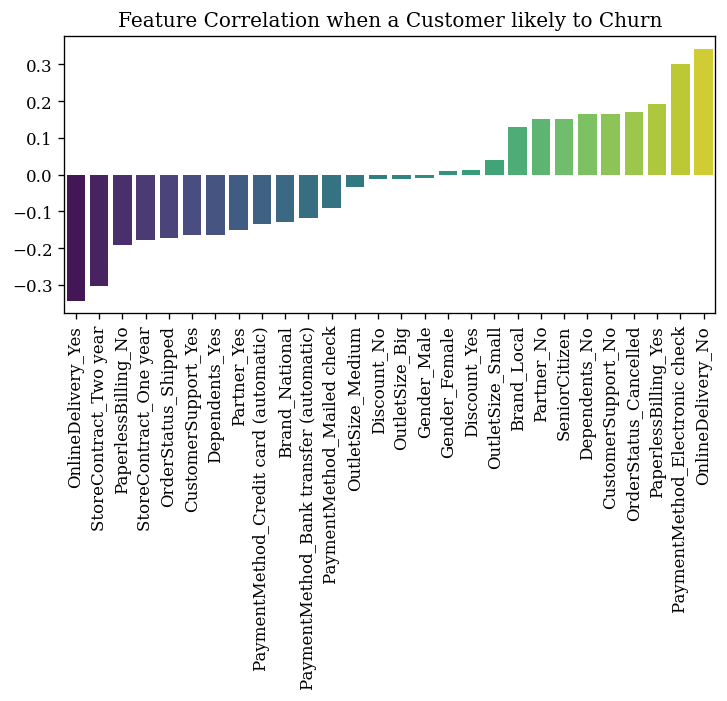

In [6]:
# Feature Correlation
df_corr  = pd.get_dummies(df[['Gender', 'SeniorCitizen', 'Partner', 'Dependents','Discount', 'OutletSize', 'OnlineDelivery',
       'OrderStatus', 'CustomerSupport', 'Brand', 'StoreContract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()
# Feature Correlation when Churn = Yes
plt.figure(figsize=(7,3),dpi=120)
sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-2].index,y=df_corr['Churn_Yes'].sort_values().iloc[1:-2].values,palette='viridis')
plt.title('Feature Correlation when a Customer likely to Churn')
plt.xticks(rotation=90);

##### Step 4: Build an ML model and track experiment run with MLFlow

In [28]:
EXPERIMENT_NAME = "03-Churn-Prediction-Experiment"
MODEL_NAME = "04-Churn-Prediction-Model-LightGBM"
TARGET_COL = "Churn"

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 38, Finished, Available, Finished)

###### 4.2: Splitting Data

Splitting the data into training and testing datasets allows us to evaluate how well the model generalizes to unseen data. The training dataset is used to build the model, while the test dataset is used to evaluate how well the model performs on unseen data. 

Here we are splitting the data into 60-40, with 60% of the data used in training and the rest 40% to test the model performance.

In [8]:
# Encoding churn as 0 and 1, Churn = 1 and Not churn = 0
df['Churn'] = df['Churn'].apply(lambda x: 0 if x=='No' else 1)

# separating dependent and independent variables
X= pd.get_dummies(df.drop(['Churn'],axis=1),drop_first=True, dtype='int64')
y= df['Churn']

# Split out the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 16, Finished, Available, Finished)

###### 4.3: Build Final Model

LightGBM is an open-source boosting algorithm for gradient boosting machines developed by Microsoft. It is a supervised machine learning algorithm that uses decision tree-based learning algorithms.

The algorithm is designed to be fast and efficient, and to produce better results than other existing boosting algorithms. It is also designed to be memory-efficient, so it can handle large datasets. LightGBM can be used for both classification and regression tasks.

The churn_model variable will be used to refer to this instance of the classifier.

In [9]:
# Best model parameters from tuned model

lgb_model = LGBMClassifier(
    
bagging_fraction=1.0, bagging_freq=7, 
boosting_type='gbdt', class_weight=None, 
colsample_bytree=1.0, feature_fraction=0.4, 
importance_type='split', learning_rate=0.05, 
max_depth=-1, min_child_samples=71, 
)

lgb_model

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 17, Finished, Available, Finished)

LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, feature_fraction=0.4,
               learning_rate=0.05, min_child_samples=71)

In this cell  a churn_model is being fit using X_train and y_train. The model is being evaluated using X_test and y_test with the metric "auc" and a callback with logging the evaluation every 10 steps.  The churn_model is then fitted to the data.

In [10]:
print(f"\n\nTraining using the train dataset Started:\n")
churn_model = lgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="auc",
    callbacks=[
        lgb.log_evaluation(10),
    ],
)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 18, Finished, Available, Finished)



Training using the train dataset Started:

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Number of positive: 1123, number of negative: 3102
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019468 seconds.
Y

2024-10-14:11:25:01,227 WARNING  [tracking_store.py:153] log_inputs not supported


StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 19, Finished, Available, Finished)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

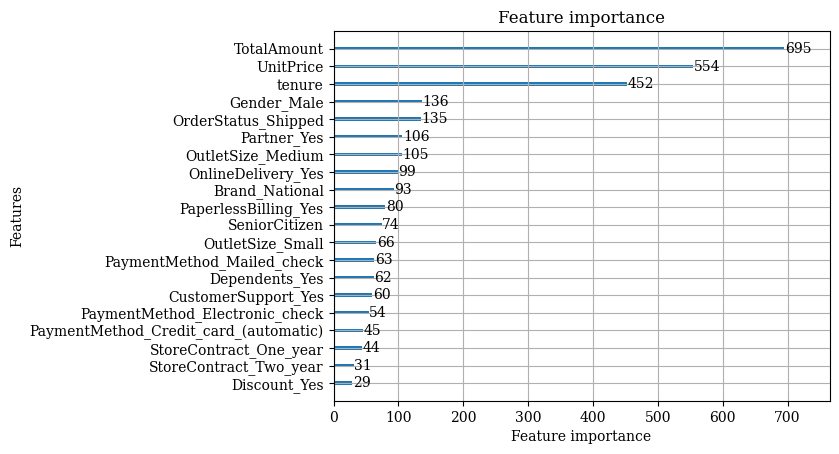

In [11]:
lgb.plot_importance(churn_model)

###### 4.5: Evaluating the Model

In this cell TARGET_COL is being set equal to "Churn". feature_cols is being set to a list of all the columns in X_test, excluding the column labeled "Churn". This is being done so that the variable feature_cols can be used to select all columns in X_test for analysis, except for the column labeled "Churn", which is the target column.

In [12]:
TARGET_COL = "Churn"
feature_cols = [c for c in X_test.columns.tolist() if c not in [TARGET_COL]]

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 20, Finished, Available, Finished)

Here we are defining a function prediction_to_spark() which is a function that takes in a model and a test set as its parameters. It creates a list of feature columns using the columns from the test set. It uses the model to make predictions on the test set. Finally, it creates a tuple of the target column and the predictions and creates a DataFrame from this tuple. The target and prediction columns are then cast to the appropriate data types.

The function then returns the DataFrame which contains the predictions.

In [13]:
def prediction_to_spark(model, test):
    feature_cols = [c for c in test.columns.tolist() if c not in [TARGET_COL]]
    predictions = model.predict(test[feature_cols], num_iteration=model.best_iteration_)
    predictions = tuple(zip(test[TARGET_COL].tolist(), predictions.tolist()))
    dataColumns = [TARGET_COL, "prediction"]
    predictions = (
        spark.createDataFrame(data=predictions, schema=dataColumns)
        .withColumn(TARGET_COL, col(TARGET_COL).cast(IntegerType()))
        .withColumn("prediction", col("prediction").cast(DoubleType()))
    )

    return predictions

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 21, Finished, Available, Finished)

The code is combining the training and testing data sets, X_train and X_test, into one dataframe called **processed_df**. 
It is then using the churn_model to make a prediction from the processed_df dataframe. The prediction is being stored in a dataframe called predictions. 
The original dataframe, df, is then being combined with the predictions dataframe to create a new dataframe called **new_df**.

In [14]:
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)
processed_df = pd.concat([train,test])

pred = prediction_to_spark(churn_model, processed_df)
predictions = pred.toPandas()
predictions = predictions.drop(['Churn'],axis=1)
new_df = pd.concat([df,predictions],axis=1)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 22, Finished, Available, Finished)

2024-10-14:11:25:42,278 WARNING  [tracking_store.py:153] log_inputs not supported


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


In the new_df dataframe we can see the predicted Churn feature, **Churn** as the last column.

In [15]:
new_df.head()

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 23, Finished, Available, Finished)

,Gender,SeniorCitizen,Partner,Dependents,tenure,Discount,OutletSize,OnlineDelivery,OrderStatus,CustomerSupport,Brand,StoreContract,PaperlessBilling,PaymentMethod,UnitPrice,TotalAmount,Churn,prediction
0,Male,0,No,No,45,No,Big,Yes,Shipped,Yes,Local,One year,No,Bank transfer (automatic),42.299999,1840.75,0,0.0
1,Female,0,No,No,42,No,Big,Yes,Shipped,Yes,Local,One year,Yes,Electronic check,54.750000,2348.45,0,0.0
2,Female,0,No,No,11,No,Big,No,Shipped,Yes,Local,One year,Yes,Credit card (automatic),40.400002,422.60,0,0.0
3,Female,0,No,No,40,No,Big,Yes,Shipped,Yes,National,One year,Yes,Bank transfer (automatic),54.549999,2236.20,0,0.0
4,Male,0,No,Yes,63,No,Big,Yes,Shipped,Yes,Local,One year,Yes,Bank transfer (automatic),40.599998,2588.95,0,0.0


This below code is creating an object called "metrics" which is a transformation of the pred object. The transformation is being done using the ComputeModelStatistics() function which uses the evaluationMetric "classification", the labelCol TARGET_COL, and the scoredLabelsCol "Prediction".

In [16]:
metrics = ComputeModelStatistics(
    evaluationMetric="classification", labelCol=TARGET_COL, scoredLabelsCol="prediction"
).transform(pred)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 24, Finished, Available, Finished)

###### 4.5.1: Confusion Metrix

The below code is selecting the confusion matrix from the 'metrics' object and converting it into an array and using the Seaborn library, created a heatmap of a confusion matrix. 
The confusion matrix is an array of numbers that represent the correct and incorrect predictions of a machine learning classifier. 

The heatmap is used to visualize the data in the confusion matrix in an easier to understand format. The figure size and titles are being set for the heatmap, as well as the labels for the x and y axes.

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 25, Finished, Available, Finished)

[[4807.  367.]
 [ 868. 1001.]]


Text(41.25, 0.5, 'True label')

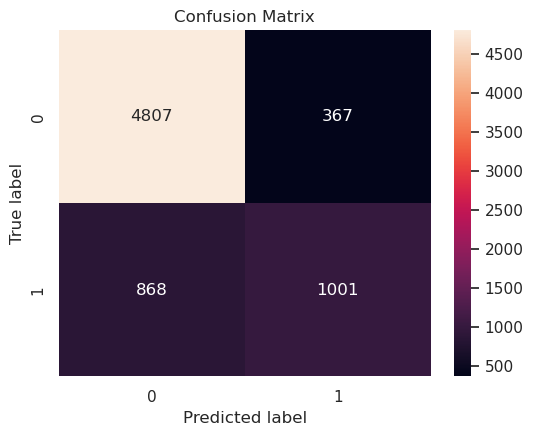

In [17]:
cm = metrics.select("confusion_matrix").collect()[0][0].toArray()
print(cm)
sns.set(rc={"figure.figsize": (6, 4.5)})
ax = sns.heatmap(cm, annot=True, fmt=".20g")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

###### 4.5.2: AUROC/AUPRC

This function is used to evaluate the model performance. It uses **BinaryClassificationEvaluator** to calculate the AUROC and AUPRC metrics. AUROC stands for Area Under the Receiver Operating Characteristic curve and AUPRC stands for Area Under the Precision-Recall Curve. 

These metrics are used to evaluate the performance of a binary classification model. The function prints out the AUROC and AUPRC scores and returns them as a tuple.

AUROC stands for Area Under the Receiver Operating Characteristic curve and AUPRC stands for Area Under the Precision-Recall Curve. These metrics are used to evaluate the performance of a binary classification model. 

AUROC measures how well the model can distinguish between classes and AUPRC measures the model's precision and recall.

In [18]:
def evaluate(predictions):
    """
    Evaluate the model by computing AUROC and AUPRC with the predictions.
    """
    # initialize the binary evaluator
    evaluator = BinaryClassificationEvaluator(
        rawPredictionCol="prediction", labelCol=TARGET_COL)
    _evaluator = lambda metric: evaluator.setMetricName(metric).evaluate(predictions)

    # calculate AUROC, baseline 0.5
    auroc = _evaluator("areaUnderROC")
    print(f"AUROC: {auroc:.4f}")
    
    # calculate AUPRC, baseline positive rate (0.172% in the demo data)
    auprc = _evaluator("areaUnderPR")
    print(f"AUPRC: {auprc:.4f}")
    return auroc, auprc

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 26, Finished, Available, Finished)

In [19]:
auroc, auprc = evaluate(pred)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 27, Finished, Available, Finished)

AUROC: 0.7323
AUPRC: 0.6234


This code is defining a variable called "signature" that stores the output of a function called "infer_signature". The function takes two parameters, X_test and a NumPy array that contains the output of a prediction model called "churn_model" when it is run on the X_test data.

The output of the function is then used to set an experiment in MLflow with the name EXPERIMENT_NAME, which has been defined above.

In [20]:
signature = infer_signature(
    X_test,
    np.array(
        churn_model.predict(X_test, num_iteration=churn_model.best_iteration_),
        dtype="int_",
    ),
)

mlflow.set_experiment(EXPERIMENT_NAME)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 28, Finished, Available, Finished)

2024-10-14:11:26:21,915 WARNING  [tracking_store.py:153] log_inputs not supported


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


<Experiment: artifact_location='', creation_time=1724408466691, experiment_id='e0a2ef12-d9ef-4afc-bed8-9396c761c247', last_update_time=None, lifecycle_stage='active', name='03-Churn-Prediction-Experiment', tags={}>

##### Step 5: Log ML model in the built-in model registry using MLFlow

The code is logging the model, metrics and parameters used for the churn model. The model, metrics and parameters are stored as variables (churn_model, auprc, auroc, data_enhancements, EXPERIMENT_NAME) and are then logged using the mlflow library.

The code logs the model using the log_model function, and the metrics using the log_metrics functions respectively.


In [29]:
# log model, metrics and params
raw_model_info = [churn_model, auprc, auroc]
data_enhancements = ["None", "SMOTE"]
for idx, info in enumerate([raw_model_info]):
    model, auprc, auroc = info
    with mlflow.start_run(nested=True) as run:
        print("log model:")
        mlflow.lightgbm.log_model(
            model,
            f"{MODEL_NAME}",
            registered_model_name=f"{MODEL_NAME}",
            signature=signature,
        )
        print("log metrics:")
        mlflow.log_metrics({"AUPRC": auprc, "AUROC": auroc})
        
        model_uri = f"runs:/{run.info.run_id}/{MODEL_NAME}"
        print("Model saved in run %s" % run.info.run_id)
        print(f"Model URI: {model_uri}")

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 39, Finished, Available, Finished)

log model:
log metrics:
Model saved in run cfb1a2e4-bccc-4318-9edc-a9154d72e30d
Model URI: runs:/cfb1a2e4-bccc-4318-9edc-a9154d72e30d/04-Churn-Prediction-Model-LightGBM


Successfully registered model '04-Churn-Prediction-Model-LightGBM'.
2024/10/14 11:40:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: 04-Churn-Prediction-Model-LightGBM, version 1
Created version '1' of model '04-Churn-Prediction-Model-LightGBM'.
2024/10/14 11:40:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run  at: https://e9cff68402ca4803af45b98d36c90830.pbidedicated.windows.net/webapi/capacities/e9cff684-02ca-4803-af45-b98d36c90830/workloads/ML/ML/Automatic/workspaceid/14d64fb3-a545-434e-a817-892a7212fafc/#/experiments/e0a2ef12-d9ef-4afc-bed8-9396c761c247/runs/cfb1a2e4-bccc-4318-9edc-a9154d72e30d.
2024/10/14 11:40:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://e9cff68402ca4803af45b98d36c90830.pbidedicated.windows.net/webapi/capacities/e9cff684-02ca-4803-af45-b98d36c90830/workloads/ML/ML/Automatic/workspaceid/14d64fb3-a545-434e-a817-892a7212fafc/#/experiments/e0

##### Step 6: Run batch scoring on Spark with scalable PREDICT UDF

###### Calling PREDICT from a notebook (PREDICT with the Transformer API)

In [24]:
spark.conf.set("spark.synapse.ml.predict.enabled", "true")

model = MLFlowTransformer(
    inputCols=feature_cols,
    outputCol="prediction",
    modelName=f"{MODEL_NAME}",
    modelVersion=1,
)
print(model)

test_df = spark.createDataFrame(data=test, schema=test.columns.to_list())
batch_predictions = model.transform(test_df)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 32, Finished, Available, Finished)

2024/10/14 11:35:25 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.17.0, required: mlflow==2.15.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


MLFlowTransformer_c57682e3e88c


StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 33, Finished, Available, Finished)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 34, Finished, Available, Finished)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 40, Finished, Available, Finished)

In [25]:
predicted_data = batch_predictions.select(col("tenure").alias("Tenure_Month"),col("UnitPrice").alias("UnitPrice"),
            col("TotalAmount").alias("TotalAmount"),col("Gender_Male").alias("GenderMale"),col("SeniorCitizen").alias("SeniorCitizen"),
            col("Partner_Yes").alias("PartnerYes"),col("Dependents_Yes").alias("DependentsYes"),col("Discount_Yes").alias("DiscountYes"),
            col("OutletSize_Medium").alias("OutletSizeMedium"),col("OutletSize_Small").alias("OutletSizeSmall"),col("OnlineDelivery_Yes").alias("OnlineDeliveryYes"),
            col("OrderStatus_Shipped").alias("OrderStatusShipped"),col("CustomerSupport_Yes").alias("CustomerSupportYes"),col("Brand_National").alias("BrandNational"),
            col("StoreContract_One year").alias("StoreContractOneYear"),col("PaperlessBilling_Yes").alias("PaperlessBillingYes"),col("PaymentMethod_Credit card (automatic)").alias("PaymentMethodCreditcardAutomatic"),
            col("PaymentMethod_Electronic check").alias("PaymentMethodElectronicCheck"),col("PaymentMethod_Mailed check").alias("PaymentMethodMailedCheck"), 
            col("Churn").alias("Churn"),col("prediction").alias("PredictedChurn"))
          
predicted_data.head(3)

StatementMeta(, a606b93f-3534-456f-bfc8-587b20263383, 35, Finished, Available, Finished)

[Row(Tenure_Month=49, UnitPrice=84.3499984741211, TotalAmount=4059.35, GenderMale=1, SeniorCitizen=0, PartnerYes=1, DependentsYes=0, DiscountYes=1, OutletSizeMedium=0, OutletSizeSmall=1, OnlineDeliveryYes=1, OrderStatusShipped=0, CustomerSupportYes=1, BrandNational=1, StoreContractOneYear=1, PaperlessBillingYes=0, PaymentMethodCreditcardAutomatic=0, PaymentMethodElectronicCheck=1, PaymentMethodMailedCheck=0, Churn=1, PredictedChurn=0),
 Row(Tenure_Month=23, UnitPrice=40.099998474121094, TotalAmount=857.75, GenderMale=1, SeniorCitizen=0, PartnerYes=0, DependentsYes=1, DiscountYes=0, OutletSizeMedium=0, OutletSizeSmall=0, OnlineDeliveryYes=1, OrderStatusShipped=0, CustomerSupportYes=1, BrandNational=0, StoreContractOneYear=0, PaperlessBillingYes=0, PaymentMethodCreditcardAutomatic=0, PaymentMethodElectronicCheck=0, PaymentMethodMailedCheck=1, Churn=0, PredictedChurn=0),
 Row(Tenure_Month=11, UnitPrice=96.19999694824219, TotalAmount=1222.05, GenderMale=0, SeniorCitizen=0, PartnerYes=1, De

##### Step 7: Store predictions in the Lakehouse (Delta parquet)

Storing predictions in the Lakehouse (Delta parquet) format allows for efficient and scalable storage of prediction results. 

In [ ]:
predicted_data.write.format('delta').mode("overwrite").save('Tables/retail_churn_prediction')

StatementMeta(, , , Waiting, , Waiting)